In [7]:
import os
from dotenv import load_dotenv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

load_dotenv()

True

In [17]:
file_name = "dbscan.csv"
path = os.environ.get("DATASET_PATH")
absolute_path = path + file_name

In [30]:
df = pd.read_csv(absolute_path)
df['neighbors'] = df['neighbors'].apply(lambda x: list(map(int, x.split(','))) if isinstance(x, str) else [])
df['num_neighbors'] = df['num_neighbors'].astype(int)

EPSILON = 7.5
MIN_POINTS = 3

df['cluster'] = -1
cluster_id = 0

In [33]:
def expand_cluster(point_index, cluster_id):
    cluster_queue = [point_index]
    df.at[point_index, 'cluster'] = cluster_id

    while cluster_queue:
        current_point_index = cluster_queue.pop(0)
        neighbors = df.at[current_point_index, 'neighbors']

        for neighbor_index in neighbors:
            x = df.at[neighbor_index, 'cluster']
            if x == -1:
                df.at[neighbor_index, 'cluster'] = cluster_id
                if df.at[neighbor_index, 'num_neighbors'] >= MIN_POINTS:
                    if neighbor_index != current_point_index:
                        cluster_queue.append(neighbor_index)

In [34]:
for index in range(len(df)):
    if df.at[index, 'cluster'] == -1:
        if df.at[index, 'num_neighbors'] >= MIN_POINTS:
            expand_cluster(index, cluster_id)
            cluster_id += 1
        else:
            df.at[index, 'cluster'] = -2

/var/folders/9d/hd3srjbx4rgbbrvnwxmcmh9c0000gn/T/ipykernel_5051/592788022.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_clusters))


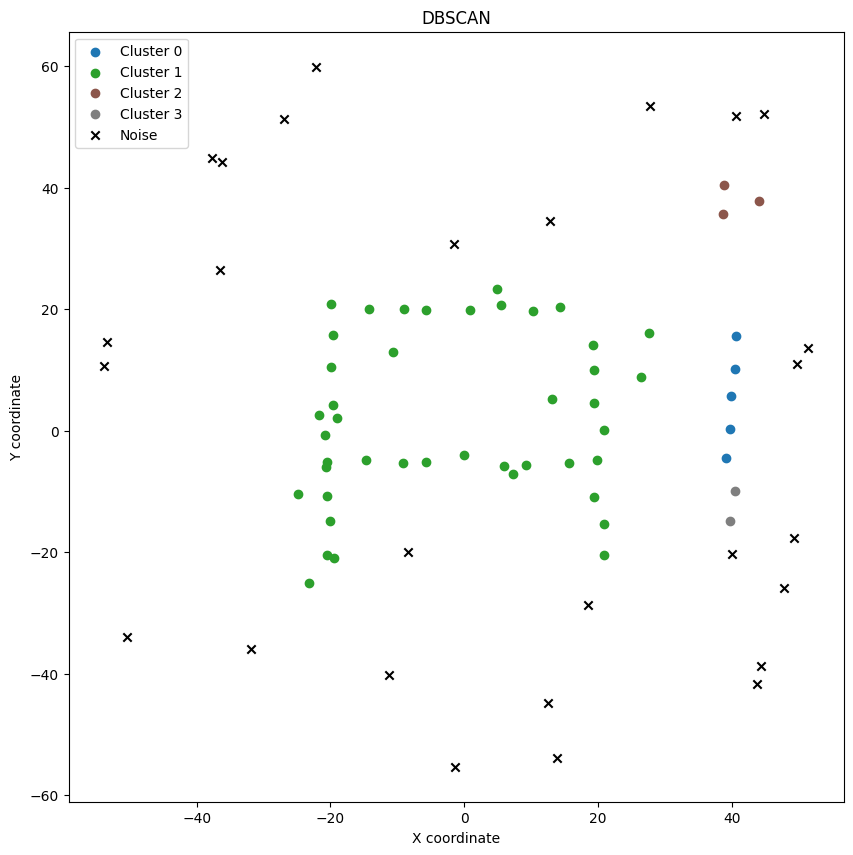

In [35]:
unique_clusters = set(df['cluster'])
colors = plt.cm.get_cmap("tab10", len(unique_clusters))
plt.figure(figsize=(10, 10))
for i, cluster in enumerate(unique_clusters):
    cluster_points = df[df['cluster'] == cluster]
    if cluster == -2:
        plt.scatter(cluster_points['x'], cluster_points['y'], color='black', label='Noise', marker='x')
    else:
        plt.scatter(cluster_points['x'], cluster_points['y'], color=colors(i), label=f'Cluster {cluster}')

plt.title("DBSCAN")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.legend()
plt.show()